In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kn
import montecarlo as m
from scipy.optimize import minimize_scalar

In [4]:
class Function:
  def __init__(self,Ms_,lash_):
    self.Ms = Ms_
    self.lash = lash_
    self.mh = 125  #GeV  Masa del bosón de Higgs
    self.vev = 246 #GeV Valor esperado del vacío
    self.val_gamma = 0
    self.T = 20 * self.Ms #Colocamos un valor de x = 20
    self.Mw=80.4
    self.Mz=90.4

  def rat(self,m):
    return m/self.mh

  def gamma(self,m):
    factor = 0
    if(2*m <= self.mh):
      f1 = (self.lash*self.vev) / (32*np.pi*self.mh)
      f2 = np.sqrt(1 - self.rat(2*m)**2)
      factor = f1 * f2
    else:
      factor = 0
    self.val_gamma = 0.00407 +  factor
    return  self.val_gamma

  def funcD(self,s):
    f1 = (s - self.mh**2)**2
    f2 = self.mh**2 * self.gamma(self.Ms)**2
    return 1 / (f1 + f2)


  def sigma_rel(self,s):
    f1 = (2*(self.lash*self.vev)**2) / (s**0.5)
    f2 = self.funcD(s) * self.gamma(self.Ms)
    return f1*f2
  
  def sigma_higgs(self,s):
    
    vs=(1- (4*(self.Ms)**2)/s)**0.5
    vh=(1- (4*(self.mh)**2)/s)**0.5
    
    t_plus=self.Ms**2 +self.mh**2 -0.5*s*(1-vs*vh)
    t_minus=self.Ms**2 +self.mh**2 -0.5*s*(1+vs*vh)
    
    aR=1+ 3*(self.mh**2) * (s-self.mh**2)*self.funcD(s)
    aI=3*(self.mh**2)*((s)**0.5) *self.gamma(self.Ms)*self.funcD(s)
    
    f=self.lash**2 /(16*np.pi*s**2 *vs)
    
    f1=(aR**2 +aI**2)*s*vs*vh
    f2=4*self.lash*self.vev**2 *(aR-(self.lash* self.vev**2)/(s-2*self.mh**2))*np.log(abs((self.Ms**2-t_plus)/(self.Ms**2-t_minus)))
    f3=(2*self.lash**2*self.vev**4 *s*vs*vh)/((self.Ms**2-t_minus)*(self.Ms**2-t_plus))
    
    return f*(f1+f2+f3)
  
  def sigma_Boson_W(self,s):
    x=self.Mw**2 /s
    vW=(1-4*x)**0.5
    
    f=vW*self.lash**2 *s/(8*np.pi)
    f1=self.funcD(s)*(1-4*x+12*x**2)
    
    return f*f1
  
  def sigma_Bonson_Z(self,s):
      x=self.Mz**2 /s
      vW=(1-4*x)**0.5
    
      f=0.5*vW*self.lash**2 *s/(8*np.pi)
      f1=self.funcD(s)*(1-4*x+12*x**2)
    
      return f*f1
    
    

  def funcion_int(self,s):
    cond = s - (2*self.Ms)**2
    '''
    if (cond>=0):
      f1 = s * np.sqrt(cond)
    else:
      f1 = 0
    '''
    suma = self.sigma_rel(s)+self.sigma_higgs(s) +self.sigma_Bonson_Z(s) +self.sigma_Boson_W(s) 
    f1 = s * np.sqrt(cond)
    fsup = f1 * kn(1,np.sqrt(s)/self.T) * suma
    finf = 16*self.T*(self.Ms**4)*kn(2,self.Ms/self.T)
    return fsup/finf

In [5]:
ms = 200
lash = 0.1
val = Function(ms,lash)
f = val.funcion_int

In [6]:
xMin = 4*ms**2
xMax = xMin*int(1e4)
print(xMin,xMax)
x = np.linspace(xMin,xMax,10000000)

list=[xMin,xMax]

160000 1600000000


In [ ]:
x_val = np.arange(xMin,xMax,10)
print(x_val)

In [29]:
y = f(x)

/tmp/ipykernel_9641/1979056421.py:48: RuntimeWarning: divide by zero encountered in divide
  f=self.lash**2 /(16*np.pi*s**2 *vs)
/tmp/ipykernel_9641/1979056421.py:54: RuntimeWarning: invalid value encountered in multiply
  return f*(f1+f2+f3)


In [30]:
res1 = minimize_scalar(lambda x: -f(x), bounds=(xMin,xMax), method='bounded')
maximo = res1.x
print(maximo)

1465760.4265987931


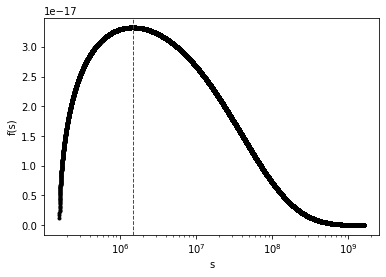

In [31]:
plt.figure()
plt.plot(x,y,'k.')
plt.xscale('log')
plt.xlabel('s')
plt.ylabel('f(s)')
#plt.xlim(int(1e4),int(1e15))
plt.axvline(maximo, color="red", linewidth=1, linestyle="dashed")
plt.show()

In [32]:
Resultado1=m.Integrador(f,1000000,list)
print(Resultado1)

El resultado es 2.4629066127656173e-09
Con error 3.9402565153669453
Cross Section en $cm^{3}/s = 2.7830844724251473e-26


In [33]:
#Método estratificado
I = [(xMin,maximo),(maximo,xMax)]
N1 = 1e7
N2 = 1e7
N = [int(N1),int(N2)]

In [ ]:
y = abs(f(x - m))

In [36]:
res2 = minimize_scalar(lambda x: abs(f(x) -maximo/2), bounds=(xMin,xMax), method='bounded')
print(maximo)
print(res2.x)

1465760.4265987931
1599999967.2295747


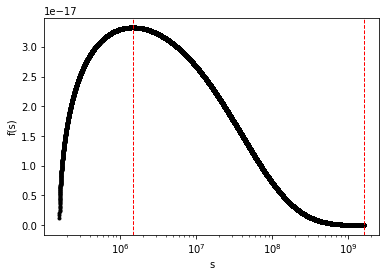

In [37]:
plt.figure()
plt.plot(x,y,'k.')
plt.xscale('log')
plt.xlabel('s')
plt.ylabel('f(s)')
#plt.xlim(int(1e4),int(1e15))
plt.axvline(maximo, color="red", linewidth=1, linestyle="dashed")
plt.axvline(res2.x, color="red", linewidth=1, linestyle="dashed")
plt.show()

In [15]:
Resultado2 = m.IntegradorEstratificado(val.funcion_int,N,I)
print(Resultado2)

El valor de la integral es: 2.461603001855555e-09 y su error  es: 4.7543620276418704e-17
